# Trade Decision Analysis

This notebook analyzes the `trade_report_full.csv` generated by the `generate_trade_report.py` script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Plot Style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

In [2]:
# Load Data
csv_path = "../data/trade_report_full.csv"
try:
    df = pd.read_csv(csv_path)
    
    # Convert Date to Datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        
    print(f"Loaded {len(df)} records.")
    display(df.head())
except FileNotFoundError:
    print(f"File not found at {csv_path}. Please ensure generate_trade_report.py has run.")

Loaded 494 records.


,Date,Symbol,Market,Score,Rec,Price @ Dec,Price +1W,Performance,Status
0,2025-12-17,SHECF,America,-,PENDING,29.60,29.60,-0.01%,Pending (<1w)
1,2025-12-17,SANM,America,42,HOLD,146.84,146.84,-0.00%,Pending (<1w)
2,2025-12-17,PSX,America,-,PENDING,131.78,131.78,-0.00%,Pending (<1w)
3,2025-12-17,NOV,America,45,HOLD,15.32,15.32,-0.00%,Pending (<1w)
4,2025-12-17,MOS,America,25,HOLD,23.46,23.46,-0.00%,Pending (<1w)


In [3]:
# Clean Data
# 1. Clean Recommendations
if 'Rec' in df.columns:
    df['Rec_Clean'] = df['Rec'].astype(str).str.strip().str.upper()
    df['Rec_Clean'] = df['Rec_Clean'].str.replace('**', '').str.strip()

# 2. Clean Performance (Convert string 'X%' to float)
df['Performance_Val'] = pd.to_numeric(df['Performance'].str.rstrip('%'), errors='coerce')

# 3. Filter for Completed Trades (those with valid numeric performance)
completed_trades = df.dropna(subset=['Performance_Val']).copy()

# 4. Filter Outliers (Performance > 20% or < -20%)
completed_trades = completed_trades[completed_trades['Performance_Val'].abs() <= 20]

# 5. Market Cleaning
if 'Market' in completed_trades.columns:
     # Replace NaN with 'Unknown' if needed
     completed_trades['Market'] = completed_trades['Market'].fillna('Unknown')

print(f"Completed Trades (Filtered): {len(completed_trades)}")
if 'Market' in completed_trades.columns:
    print("Markets found:", completed_trades['Market'].unique())

Completed Trades (Filtered): 232
Markets found: ['America' 'Europe (Eurozone)']


/var/folders/rv/mynhr5bs39d1wlydjj5t8b0c0000gn/T/ipykernel_73254/4094577956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="Rec_Clean", y="Performance_Val", data=completed_trades, palette="viridis")


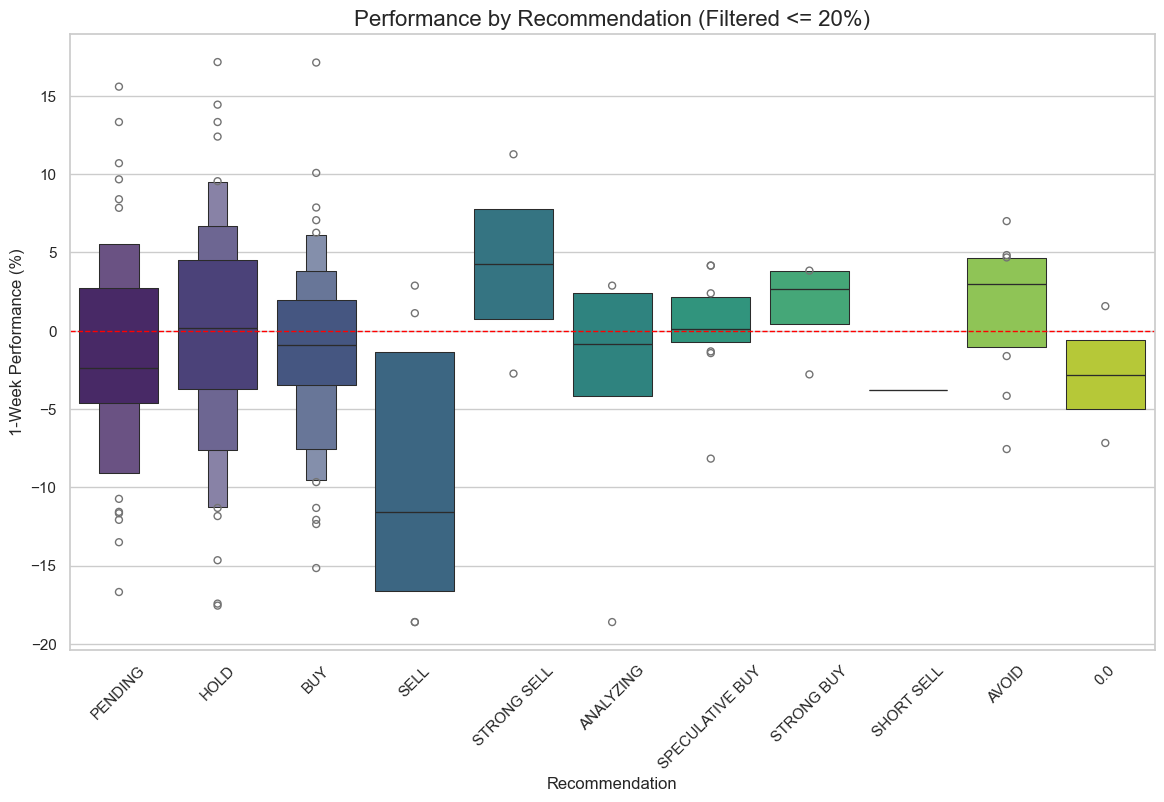

In [4]:
# Plot 1: Recommendation vs Performance (Box Plot)
plt.figure(figsize=(14, 8))
sns.boxenplot(x="Rec_Clean", y="Performance_Val", data=completed_trades, palette="viridis")

plt.title("Performance by Recommendation (Filtered <= 20%)", fontsize=16)
plt.xlabel("Recommendation", fontsize=12)
plt.ylabel("1-Week Performance (%)", fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=45)
plt.show()

/var/folders/rv/mynhr5bs39d1wlydjj5t8b0c0000gn/T/ipykernel_73254/3387441511.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Market", y="Performance_Val", data=completed_trades, order=market_order, palette="Set2")


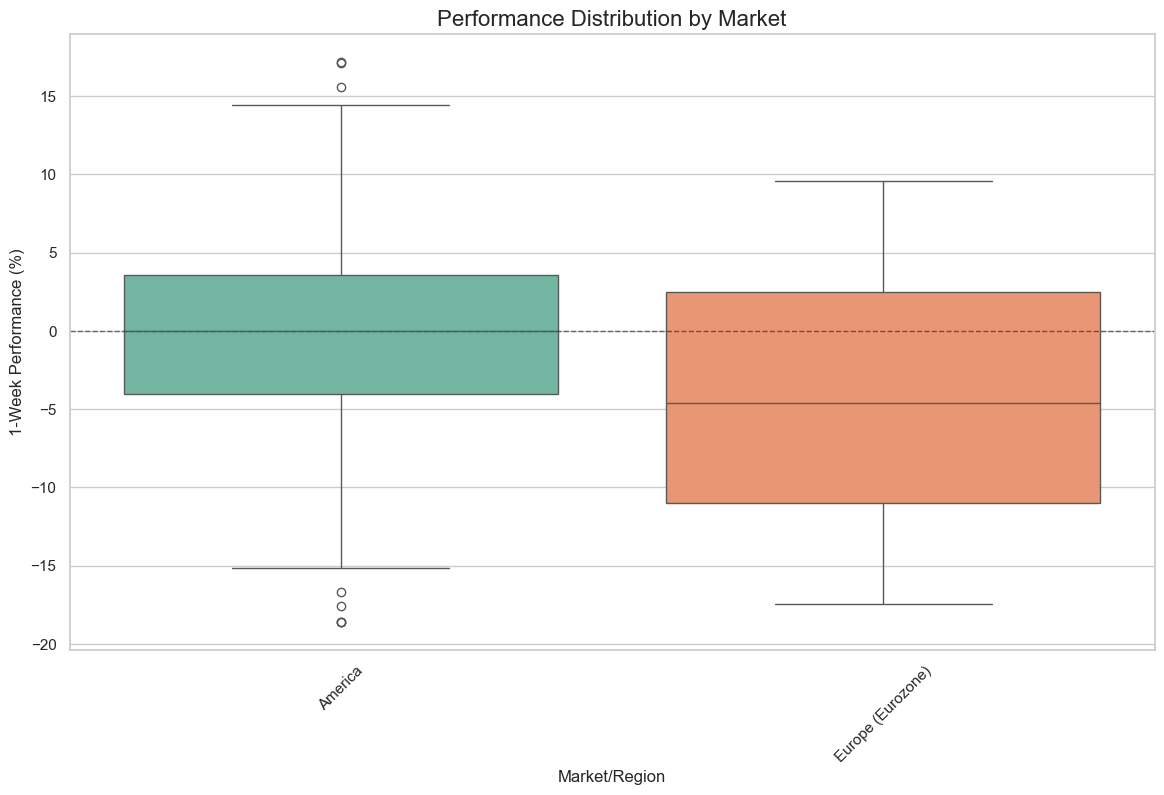

In [5]:
# Plot 2: Performance by Market (New!)
if 'Market' in completed_trades.columns:
    plt.figure(figsize=(14, 8))
    # Order by median performance maybe?
    market_order = completed_trades.groupby('Market')['Performance_Val'].median().sort_values(ascending=False).index
    
    sns.boxplot(x="Market", y="Performance_Val", data=completed_trades, order=market_order, palette="Set2")
    
    plt.title("Performance Distribution by Market", fontsize=16)
    plt.xlabel("Market/Region", fontsize=12)
    plt.ylabel("1-Week Performance (%)", fontsize=12)
    plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(rotation=45)
    plt.show()

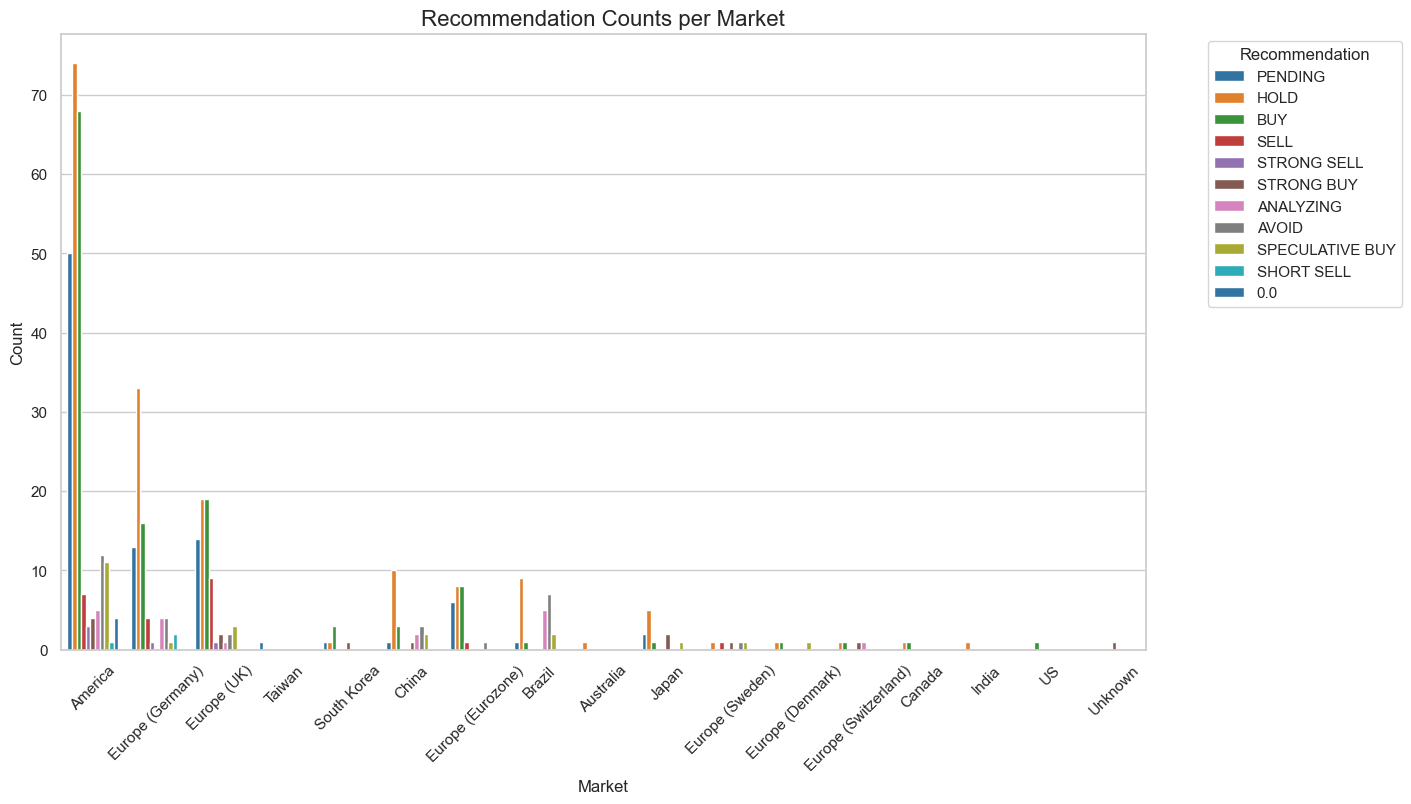

In [6]:
# Plot 3: Recommendations per Market (Count Plot)
if 'Market' in df.columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(x="Market", hue="Rec_Clean", data=df, palette="tab10")
    
    plt.title("Recommendation Counts per Market", fontsize=16)
    plt.xlabel("Market", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Recommendation", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()